#### Carregamos os dados para treino

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv("Safra_2018-2019.csv", index_col=0).drop('Identificador_Agricultor', axis=1)
y = train.dano_na_plantacao.copy()
X = train.drop('dano_na_plantacao', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)


#### Preparamos uma pipeline:
    SimpleImputer para lidar com os nan na coluna 'Semanas_Utilizadas', considerando-os como zero pois não são fornecidos para 'Categoria_de_Pesticida':0, nunca utilizou.
    OneHotEncoder para transformar as variaveis categoricas.
    XGBClassifier como modelo pela utilidade de termos uma medida da importância de cada coluna.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import plot_importance

imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer_columns = ['Semanas_Utilizando']

onehot = OneHotEncoder(handle_unknown='ignore')
onehot_columns = ['Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida','Temporada']

preprocessor = ColumnTransformer(transformers= [('imputer', imputer, imputer_columns), ('onehot', onehot, onehot_columns)])

model = XGBClassifier()

In [3]:
pipeline = Pipeline(steps=[('preprocess', preprocessor), ('model',model)])

In [4]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=0,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['Semanas_Utilizando']),
                                                 ('onehot',
                                                  OneHotEncoder(categories='auto',
 

In [5]:
preds = pipeline.predict(X_valid)

In [6]:
(preds==y_valid).describe()

count     16000
unique        2
top        True
freq      13456
Name: dano_na_plantacao, dtype: object

In [7]:
13456/16000 

0.841

In [8]:
safra_2020 = pd.read_csv('Safra_2020.csv', index_col=0).drop('Identificador_Agricultor', axis=1)

In [9]:
safra_2020['previsão_de_danos'] = pipeline.predict(safra_2020)

#### No plot, vemos a importância das variáveis de acordo com a nota no F-score. 
Para pensarmos nos fatores que mais contribuem para uma boa safra, podemos estudar a correlação entre as colunas mais relevantes mostradas no plot e a coluna de estimativa de insetos por m².

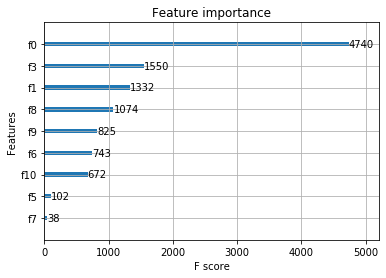

In [10]:
plot_importance(model)
plt.show()